In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pystan
import scipy.stats as stats

import scipy.stats as stats

In [2]:
norm_code = """
data {
    int<lower=0> n;
    real y[n];
}
transformed data {}
parameters {
    real<lower=0, upper=100> mu;
    real<lower=0, upper=10> sigma;
}
transformed parameters {}
model {
    y ~ normal(mu, sigma);
}
generated quantities {}
"""

norm_dat = {
             'n': 100,
             'y': np.random.normal(10, 2, 100),
            }

fit = pystan.stan(model_code=norm_code, data=norm_dat, iter=1000, chains=1)

In [3]:
print(fit)

Inference for Stan model: anon_model_28da12e8c84b1a8354384170469e2407.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     10.04    0.02    0.2   9.67    9.9  10.04  10.19  10.42    138   1.01
sigma   2.02    0.01   0.14   1.77   1.93   2.01   2.11   2.32    148   1.01
lp__  -117.1    0.09   0.96 -119.7 -117.4 -116.9 -116.5 -116.2    106   1.01

Samples were drawn using NUTS(diag_e) at Tue Oct  6 09:25:32 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [4]:
trace = fit.extract()

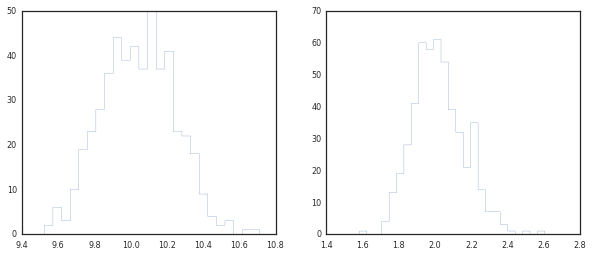

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
plt.hist(trace['mu'][:], 25, histtype='step');
plt.subplot(1,2,2);
plt.hist(trace['sigma'][:], 25, histtype='step');

In [12]:
# コンパイル済みモデルの保存
model = pystan.StanModel(model_code=norm_code) 
import pickle
f = open('norm_model.pic', 'wb')
pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

#new_model = pickle.load(open('norm_model.pic', 'r'))